# Logitistic Regression
## Data Cleaning

### ADULT Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets 
adult = pd.read_csv('adult.data')
adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education num', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'capital gain', 'capital loss', 'hours per week', 'country', 'income']

#replaces any empty spots with a blank space
adult['workclass'] = adult['workclass'].replace(' ?', np.nan)
adult['occupation'] = adult['occupation'].replace(' ?', np.nan)
adult['country'] = adult['country'].replace(' ?', np.nan)

#takes out any blank spaces in the dataset
adult.dropna(how='any', inplace=True)

#drops fnlwgt column
adult.drop(['fnlwgt'], axis=1, inplace=True)

#one-hot encoding
adult['workclass'] = adult['workclass'].map({' Self-emp-not-inc': 0,
                                            ' Self-emp-inc': 1,
                                            ' Local-gov': 2,
                                            ' State-gov': 3,
                                            ' Federal-gov': 4,
                                            ' Private': 5,
                                            ' Without-pay': 6,})
adult['education'] = adult['education'].map({' Preschool': 0,
                                            ' 1st-4th': 1,
                                            ' 5th-6th': 2,
                                            ' 7th-8th': 3,
                                            ' 9th': 4,
                                            ' 10th': 5,
                                            ' 11th': 6,
                                            ' 12th': 7,
                                            ' HS-grad': 8,
                                            ' Some-college': 9,
                                            ' Assoc-acdm': 10,
                                            ' Assoc-voc': 11,
                                            ' Bachelors': 12,
                                            ' Masters': 13,
                                            ' Doctorate': 14,
                                            ' Prof-school': 15})
adult['marital status'] = adult['marital status'].map({' Never-married': 0,
                                                      ' Married-civ-spouse': 1,
                                                      ' Married-AF-spouse': 2,
                                                      ' Married-spouse-absent': 3,
                                                      ' Divorced': 4,
                                                      ' Separated': 5,
                                                      ' Widowed': 6})
adult['occupation'] = adult['occupation'].map({' Exec-managerial': 0,
                                              ' Handlers-cleaners': 1,
                                              ' Prof-specialty': 2,
                                              ' Other-service': 3,
                                              ' Adm-clerical': 4,
                                              ' Sales': 5,
                                              ' Transport-moving': 6,
                                              ' Farming-fishing': 7,
                                              ' Machine-op-inspct': 8,
                                              ' Tech-support': 9,
                                              ' Craft-repair': 10,
                                              ' Protective-serv': 11,
                                              ' Armed-Forces': 12,
                                              ' Priv-house-serv': 13})
adult['relationship'] = adult['relationship'].map({' Husband': 0,
                                                  ' Not-in-family': 1,
                                                  ' Wife': 2,
                                                  ' Own-child': 3,
                                                  ' Unmarried': 4,
                                                  ' Other-relative': 5})
adult['race'] = adult['race'].map({' White': 0, ' Black': 1, 
                                  ' Asian-Pac-Islander': 2,
                                  ' Amer-Indian-Eskimo': 3,
                                  ' Other': 4})
adult['country'] = np.where(adult['country'] != ' United-States', 0, 1)
adult['sex'] = adult['sex'].map({' Male': 0, ' Female': 1})
adult['income'] = adult['income'].map({' <=50K': 0, ' >50K': 1})
adult.head()

,age,workclass,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,50,0,12,13,1,0,0,0,0,0,0,13,1,0
1,38,5,8,9,4,1,1,0,0,0,0,40,1,0
2,53,5,6,7,1,1,0,1,0,0,0,40,1,0
3,28,5,12,13,1,2,2,1,1,0,0,40,0,0
4,37,5,13,14,1,0,2,0,1,0,0,40,1,0


### LETTER Dataset

In [2]:
letter = pd.read_csv('letter-recognition.data')
letter.columns = ['lettr', 'x-box', 'y-box', 'width', 'height', 
                  'pixels', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 
                  'xybar', 'x2ybr', 'xy2br', 'x ege', 'xegvy',
                  'y-ege', 'yegvx']

#one-hot encoding
letter['lettr'] = letter['lettr'].map({
    'A':0, 'B':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'I':0,
    'J':0, 'K':0, 'L':0, 'M':0, 'N':1, 'O':1, 'P':1, 'Q':1, 'R':1,
    'S':1, 'T':1, 'U':1, 'V':1, 'W':1, 'X':1, 'Y':1, 'Z':1})
letter.head()

,lettr,x-box,y-box,width,height,pixels,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x ege,xegvy,y-ege,yegvx
0,0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,0,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,1,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,0,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,1,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


### CHESS Dataset

In [3]:
chess = pd.read_csv('krkopt.data')
chess.columns = ['White King file', 'White King rank', 'White Rook file',
                 'White Rook rank', 'Black King file', 
                 'Black King rank', 'Optimal Depth of Win']

#one-hot encoding
chess['White King file'] = chess['White King file'].map({'a': 0, 'b': 1,
                                                        'c': 2, 'd': 3})
chess['White Rook file'] = chess['White Rook file'].map({'a': 0, 'b': 1,
                                                        'c': 2, 'd': 3,
                                                        'e': 4, 'f': 5,
                                                        'g': 6, 'h': 7})
chess['Black King file'] = chess['Black King file'].map({'a': 0, 'b': 1,
                                                        'c': 2, 'd': 3,
                                                        'e': 4, 'f': 5,
                                                        'g': 6, 'h': 7})
chess['Optimal Depth of Win'] = chess['Optimal Depth of Win'].map({
    'zero': 1, 'one': 1, 'two': 1, 'three': 1, 'four': 1, 'five': 1,
    'six': 1, 'seven': 1, 'eight': 1, 'nine': 0, 'ten': 0, 'eleven': 0,
    'twelve': 0, 'thirteen': 0, 'fourteen': 0, 'fifteen': 0, 
    'sixteen': 0, 'draw': 0})
chess.head()

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,Optimal Depth of Win
0,0,1,2,1,2,2,0
1,0,1,2,1,3,1,0
2,0,1,2,1,3,2,0
3,0,1,2,2,2,1,0
4,0,1,2,2,2,3,0


### OCCUPANCY Dataset

In [4]:
occupancy = pd.read_csv('occupancy_data.txt')

#drop unnecessary column
occupancy = occupancy.drop('date',axis=1)
occupancy.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


## Data Analysis

### Training LOGREG

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

NUM_TRIALS = 5

#adult data & target
X_a = adult.drop('income', axis=1)
Y_a = adult['income']

#letter data & target
X_l = letter.drop('lettr', axis=1)
Y_l = letter['lettr']

#chess data & target
X_c = chess.drop('Optimal Depth of Win', axis=1)
Y_c = chess['Optimal Depth of Win']

#occupancy data & target
X_o = occupancy.drop('Occupancy',axis=1)
Y_o = occupancy['Occupancy']

In [6]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])
X_a_train, X_a_test, Y_a_train, Y_a_test = train_test_split(X_a,Y_a,
                                                           train_size=5000)
X_l_train, X_l_test, Y_l_train, Y_l_test = train_test_split(X_l,Y_l,
                                                           train_size=5000)
X_c_train, X_c_test, Y_c_train, Y_c_test = train_test_split(X_c,Y_c,
                                                           train_size=5000)
X_o_train, X_o_test, Y_o_train, Y_o_test = train_test_split(X_o,Y_o,
                                                           train_size=5000)

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search 
model = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc_ovr', 'f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
model_adult =  model.fit(X_a_train, Y_a_train)
model_letter =  model.fit(X_l_train, Y_l_train)
model_chess =  model.fit(X_c_train, Y_c_train)
model_occupancy =  model.fit(X_o_train, Y_o_train)

# below we will get a bunch of warnings as some hyperparameters settings don't converge

CPU times: user 1min 5s, sys: 52.7 s, total: 1min 58s
Wall time: 1min 8s


## Raw Tables

In [53]:
#function that finds the average
def avg(array):
    return sum(array)/len(array)

### Accuracy

In [54]:
adult_acc_1 = avg(model_adult.cv_results_['split0_test_accuracy'])
adult_acc_2 = avg(model_adult.cv_results_['split1_test_accuracy'])
adult_acc_3 = avg(model_adult.cv_results_['split2_test_accuracy'])
adult_acc_4 = avg(model_adult.cv_results_['split3_test_accuracy'])
adult_acc_5 = avg(model_adult.cv_results_['split4_test_accuracy'])
letter_acc_1 = avg(model_letter.cv_results_['split0_test_accuracy'])
letter_acc_2 = avg(model_letter.cv_results_['split1_test_accuracy'])
letter_acc_3 = avg(model_letter.cv_results_['split2_test_accuracy'])
letter_acc_4 = avg(model_letter.cv_results_['split3_test_accuracy'])
letter_acc_5 = avg(model_letter.cv_results_['split4_test_accuracy'])
chess_acc_1 = avg(model_chess.cv_results_['split0_test_accuracy'])
chess_acc_2 = avg(model_chess.cv_results_['split1_test_accuracy'])
chess_acc_3 = avg(model_chess.cv_results_['split2_test_accuracy'])
chess_acc_4 = avg(model_chess.cv_results_['split3_test_accuracy'])
chess_acc_5 = avg(model_chess.cv_results_['split4_test_accuracy'])
occupancy_acc_1 = avg(model_occupancy.cv_results_['split0_test_accuracy'])
occupancy_acc_2 = avg(model_occupancy.cv_results_['split1_test_accuracy'])
occupancy_acc_3 = avg(model_occupancy.cv_results_['split2_test_accuracy'])
occupancy_acc_4 = avg(model_occupancy.cv_results_['split3_test_accuracy'])
occupancy_acc_5 = avg(model_occupancy.cv_results_['split4_test_accuracy'])

In [55]:
log_reg_acc = [adult_acc_1, adult_acc_2, adult_acc_3, adult_acc_4, adult_acc_5,
          letter_acc_1, letter_acc_2, letter_acc_3, letter_acc_4, letter_acc_5,
          chess_acc_1, chess_acc_2, chess_acc_3, chess_acc_4, chess_acc_5,
          occupancy_acc_1, occupancy_acc_2, occupancy_acc_3, occupancy_acc_4, occupancy_acc_5]
log_reg_acc

[0.9584827586206897,
 0.9528275862068967,
 0.9522413793103451,
 0.9564482758620688,
 0.9551379310344822,
 0.9584827586206897,
 0.9528275862068967,
 0.9522413793103451,
 0.9564482758620688,
 0.9551379310344822,
 0.9584827586206897,
 0.9528275862068967,
 0.9522413793103451,
 0.9564482758620688,
 0.9551379310344822,
 0.9584827586206897,
 0.9528275862068967,
 0.9522413793103451,
 0.9564482758620688,
 0.9551379310344822]

### ROC AUC

In [56]:
adult_roc_1 = avg(model_adult.cv_results_['split0_test_roc_auc_ovr'])
adult_roc_2 = avg(model_adult.cv_results_['split1_test_roc_auc_ovr'])
adult_roc_3 = avg(model_adult.cv_results_['split2_test_roc_auc_ovr'])
adult_roc_4 = avg(model_adult.cv_results_['split3_test_roc_auc_ovr'])
adult_roc_5 = avg(model_adult.cv_results_['split4_test_roc_auc_ovr'])
letter_roc_1 = avg(model_letter.cv_results_['split0_test_roc_auc_ovr'])
letter_roc_2 = avg(model_letter.cv_results_['split1_test_roc_auc_ovr'])
letter_roc_3 = avg(model_letter.cv_results_['split2_test_roc_auc_ovr'])
letter_roc_4 = avg(model_letter.cv_results_['split3_test_roc_auc_ovr'])
letter_roc_5 = avg(model_letter.cv_results_['split4_test_roc_auc_ovr'])
chess_roc_1 = avg(model_chess.cv_results_['split0_test_roc_auc_ovr'])
chess_roc_2 = avg(model_chess.cv_results_['split1_test_roc_auc_ovr'])
chess_roc_3 = avg(model_chess.cv_results_['split2_test_roc_auc_ovr'])
chess_roc_4 = avg(model_chess.cv_results_['split3_test_roc_auc_ovr'])
chess_roc_5 = avg(model_chess.cv_results_['split4_test_roc_auc_ovr'])
occupancy_roc_1 = avg(model_occupancy.cv_results_['split0_test_roc_auc_ovr'])
occupancy_roc_2 = avg(model_occupancy.cv_results_['split1_test_roc_auc_ovr'])
occupancy_roc_3 = avg(model_occupancy.cv_results_['split2_test_roc_auc_ovr'])
occupancy_roc_4 = avg(model_occupancy.cv_results_['split3_test_roc_auc_ovr'])
occupancy_roc_5 = avg(model_occupancy.cv_results_['split4_test_roc_auc_ovr'])

In [57]:
log_reg_roc = [adult_roc_1, adult_roc_2, adult_roc_3, adult_roc_4, adult_roc_5,
          letter_roc_1, letter_roc_2, letter_roc_3, letter_roc_4, letter_roc_5,
          chess_roc_1, chess_roc_2, chess_roc_3, chess_roc_4, chess_roc_5,
          occupancy_roc_1, occupancy_roc_2, occupancy_roc_3, occupancy_roc_4, occupancy_roc_5]
log_reg_roc

[0.9777642747435589,
 0.9784066597292779,
 0.9738199704769152,
 0.9764609074517696,
 0.9748325407730145,
 0.9777642747435589,
 0.9784066597292779,
 0.9738199704769152,
 0.9764609074517696,
 0.9748325407730145,
 0.9777642747435589,
 0.9784066597292779,
 0.9738199704769152,
 0.9764609074517696,
 0.9748325407730145,
 0.9777642747435589,
 0.9784066597292779,
 0.9738199704769152,
 0.9764609074517696,
 0.9748325407730145]

### F1

In [58]:
adult_f1_1 = avg(model_adult.cv_results_['split0_test_f1_micro'])
adult_f1_2 = avg(model_adult.cv_results_['split1_test_f1_micro'])
adult_f1_3 = avg(model_adult.cv_results_['split2_test_f1_micro'])
adult_f1_4 = avg(model_adult.cv_results_['split3_test_f1_micro'])
adult_f1_5 = avg(model_adult.cv_results_['split4_test_f1_micro'])
letter_f1_1 = avg(model_letter.cv_results_['split0_test_f1_micro'])
letter_f1_2 = avg(model_letter.cv_results_['split1_test_f1_micro'])
letter_f1_3 = avg(model_letter.cv_results_['split2_test_f1_micro'])
letter_f1_4 = avg(model_letter.cv_results_['split3_test_f1_micro'])
letter_f1_5 = avg(model_letter.cv_results_['split4_test_f1_micro'])
chess_f1_1 = avg(model_chess.cv_results_['split0_test_f1_micro'])
chess_f1_2 = avg(model_chess.cv_results_['split1_test_f1_micro'])
chess_f1_3 = avg(model_chess.cv_results_['split2_test_f1_micro'])
chess_f1_4 = avg(model_chess.cv_results_['split3_test_f1_micro'])
chess_f1_5 = avg(model_chess.cv_results_['split4_test_f1_micro'])
occupancy_f1_1 = avg(model_occupancy.cv_results_['split0_test_f1_micro'])
occupancy_f1_2 = avg(model_occupancy.cv_results_['split1_test_f1_micro'])
occupancy_f1_3 = avg(model_occupancy.cv_results_['split2_test_f1_micro'])
occupancy_f1_4 = avg(model_occupancy.cv_results_['split3_test_f1_micro'])
occupancy_f1_5 = avg(model_occupancy.cv_results_['split4_test_f1_micro'])

In [59]:
log_reg_f1 = [adult_f1_1, adult_f1_2, adult_f1_3, adult_f1_4, adult_f1_5,
          letter_f1_1, letter_f1_2, letter_f1_3, letter_f1_4, letter_f1_5,
          chess_f1_1, chess_f1_2, chess_f1_3, chess_f1_4, chess_f1_5,
          occupancy_f1_1, occupancy_f1_2, occupancy_f1_3, occupancy_f1_4, occupancy_f1_5]
log_reg_f1

[0.9584827586206897,
 0.9528275862068967,
 0.9522413793103451,
 0.9564482758620688,
 0.9551379310344822,
 0.9584827586206897,
 0.9528275862068967,
 0.9522413793103451,
 0.9564482758620688,
 0.9551379310344822,
 0.9584827586206897,
 0.9528275862068967,
 0.9522413793103451,
 0.9564482758620688,
 0.9551379310344822,
 0.9584827586206897,
 0.9528275862068967,
 0.9522413793103451,
 0.9564482758620688,
 0.9551379310344822]

### Analysis on ADULT

In [39]:
#classification report on accuracy
param_adult_accuracy = model_adult.cv_results_['params'][np.argmin(model_adult.cv_results_['rank_test_accuracy'])]
pipe.set_params(**param_adult_accuracy)
pipe.fit(X_a_train, Y_a_train)
Y_a_train_pred_accuracy = pipe.predict(X_a_train)
print("Training Accuracy Set: \n", classification_report(Y_a_train,Y_a_train_pred_accuracy))

pipe.set_params(**param_adult_accuracy)
pipe.fit(X_a_test, Y_a_test)
Y_a_test_pred_accuracy = pipe.predict(X_a_test)
print("Testing Accuracy Set: \n", classification_report(Y_a_test,Y_a_test_pred_accuracy))


Training Accuracy Set: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      3808
           1       0.77      0.35      0.48      1192

    accuracy                           0.82      5000
   macro avg       0.80      0.66      0.69      5000
weighted avg       0.81      0.82      0.79      5000

Testing Accuracy Set: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     18845
           1       0.75      0.48      0.59      6316

    accuracy                           0.83     25161
   macro avg       0.80      0.71      0.74     25161
weighted avg       0.82      0.83      0.82     25161



In [40]:
#classification report on roc_auc_ovr
param_adult_roc_auc_ovr = model_adult.cv_results_['params'][np.argmin(model_adult.cv_results_['rank_test_roc_auc_ovr'])]
pipe.set_params(**param_adult_roc_auc_ovr)
pipe.fit(X_a_train, Y_a_train)
Y_a_train_pred_roc_auc_ovr = pipe.predict(X_a_train)
print("Training ROC AUC Set: \n", classification_report(Y_a_train,Y_a_train_pred_roc_auc_ovr))

pipe.set_params(**param_adult_roc_auc_ovr)
pipe.fit(X_a_test, Y_a_test)
Y_a_test_pred_roc_auc_ovr = pipe.predict(X_a_test)
print("Testing ROC AUC Set: \n", classification_report(Y_a_test,Y_a_test_pred_roc_auc_ovr))


Training ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      3808
           1       0.72      0.48      0.58      1192

    accuracy                           0.83      5000
   macro avg       0.79      0.71      0.74      5000
weighted avg       0.82      0.83      0.82      5000

Testing ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     18845
           1       0.74      0.50      0.60      6316

    accuracy                           0.83     25161
   macro avg       0.79      0.72      0.74     25161
weighted avg       0.82      0.83      0.82     25161



In [41]:
#classification report on f1_micro
param_adult_f1_micro = model_adult.cv_results_['params'][np.argmin(model_adult.cv_results_['rank_test_f1_micro'])]
pipe.set_params(**param_adult_f1_micro)
pipe.fit(X_a_train, Y_a_train)
Y_a_train_pred_f1_micro = pipe.predict(X_a_train)
print("Training F1 Micro Set\n",classification_report(Y_a_train,Y_a_train_pred_f1_micro))

pipe.set_params(**param_adult_f1_micro)
pipe.fit(X_a_test, Y_a_test)
Y_a_test_pred_f1_micro = pipe.predict(X_a_test)
print("Testing F1 Micro Set\n", classification_report(Y_a_test,Y_a_test_pred_f1_micro))


Training F1 Micro Set
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      3808
           1       0.77      0.35      0.48      1192

    accuracy                           0.82      5000
   macro avg       0.80      0.66      0.69      5000
weighted avg       0.81      0.82      0.79      5000

Testing F1 Micro Set
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     18845
           1       0.75      0.48      0.59      6316

    accuracy                           0.83     25161
   macro avg       0.80      0.71      0.74     25161
weighted avg       0.82      0.83      0.82     25161



### Analysis on LETTER

In [42]:
#classification report on accuracy
param_letter_accuracy = model_letter.cv_results_['params'][np.argmin(model_letter.cv_results_['rank_test_accuracy'])]
pipe.set_params(**param_letter_accuracy)
pipe.fit(X_l_train, Y_l_train)
Y_l_train_pred_accuracy = pipe.predict(X_l_train)
print("Training Accuracy Set: \n", classification_report(Y_l_train,Y_l_train_pred_accuracy))

pipe.set_params(**param_adult_accuracy)
pipe.fit(X_l_test, Y_l_test)
Y_l_test_pred_accuracy = pipe.predict(X_l_test)
print("Testing Accuracy Set: \n", classification_report(Y_l_test,Y_l_test_pred_accuracy))



Training Accuracy Set: 
               precision    recall  f1-score   support

           0       0.70      0.75      0.72      2518
           1       0.72      0.67      0.69      2482

    accuracy                           0.71      5000
   macro avg       0.71      0.71      0.71      5000
weighted avg       0.71      0.71      0.71      5000

Testing Accuracy Set: 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      7422
           1       0.73      0.71      0.72      7577

    accuracy                           0.72     14999
   macro avg       0.72      0.72      0.72     14999
weighted avg       0.72      0.72      0.72     14999



In [43]:
#classification report on roc_auc_ovr
param_letter_roc_auc_ovr = model_letter.cv_results_['params'][np.argmin(model_letter.cv_results_['rank_test_roc_auc_ovr'])]
pipe.set_params(**param_letter_roc_auc_ovr)
pipe.fit(X_l_train, Y_l_train)
Y_l_train_pred_roc_auc_ovr = pipe.predict(X_l_train)
print("Training ROC AUC Set: \n", classification_report(Y_l_train,Y_l_train_pred_roc_auc_ovr))

pipe.set_params(**param_adult_roc_auc_ovr)
pipe.fit(X_l_test, Y_l_test)
Y_l_test_pred_roc_auc_ovr = pipe.predict(X_l_test)
print("Testing ROC AUC Set: \n", classification_report(Y_l_test,Y_l_test_pred_roc_auc_ovr))


Training ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.73      0.76      0.74      2518
           1       0.74      0.71      0.73      2482

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000

Testing ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72      7422
           1       0.73      0.72      0.72      7577

    accuracy                           0.72     14999
   macro avg       0.72      0.72      0.72     14999
weighted avg       0.72      0.72      0.72     14999



In [44]:
#classification report on f1_micro
param_letter_f1_micro = model_letter.cv_results_['params'][np.argmin(model_letter.cv_results_['rank_test_f1_micro'])]
pipe.set_params(**param_letter_f1_micro)
pipe.fit(X_l_train, Y_l_train)
Y_l_train_pred_f1_micro = pipe.predict(X_l_train)
print("Training F1 Micro Set\n",classification_report(Y_l_train,Y_l_train_pred_f1_micro))

pipe.set_params(**param_adult_f1_micro)
pipe.fit(X_l_test, Y_l_test)
Y_l_test_pred_f1_micro = pipe.predict(X_l_test)
print("Testing F1 Micro Set\n", classification_report(Y_l_test,Y_l_test_pred_f1_micro))


Training F1 Micro Set
               precision    recall  f1-score   support

           0       0.70      0.75      0.72      2518
           1       0.72      0.67      0.69      2482

    accuracy                           0.71      5000
   macro avg       0.71      0.71      0.71      5000
weighted avg       0.71      0.71      0.71      5000

Testing F1 Micro Set
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      7422
           1       0.73      0.71      0.72      7577

    accuracy                           0.72     14999
   macro avg       0.72      0.72      0.72     14999
weighted avg       0.72      0.72      0.72     14999



### Analysis on CHESS

In [45]:
#classification report on accuracy
param_chess_accuracy = model_chess.cv_results_['params'][np.argmin(model_chess.cv_results_['rank_test_accuracy'])]
pipe.set_params(**param_chess_accuracy)
pipe.fit(X_c_train, Y_c_train)
Y_c_train_pred_accuracy = pipe.predict(X_c_train)
print("Training Accuracy Set: \n", classification_report(Y_c_train,Y_c_train_pred_accuracy))

pipe.set_params(**param_adult_accuracy)
pipe.fit(X_c_test, Y_c_test)
Y_c_test_pred_accuracy = pipe.predict(X_c_test)
print("Testing Accuracy Set: \n", classification_report(Y_c_test,Y_c_test_pred_accuracy))


Training Accuracy Set: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      4366
           1       0.85      0.32      0.46       634

    accuracy                           0.91      5000
   macro avg       0.88      0.66      0.71      5000
weighted avg       0.90      0.91      0.89      5000

Testing Accuracy Set: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     19880
           1       0.77      0.52      0.62      3175

    accuracy                           0.91     23055
   macro avg       0.85      0.75      0.79     23055
weighted avg       0.91      0.91      0.91     23055



In [46]:
#classification report on roc_auc_ovr
param_chess_roc_auc_ovr = model_chess.cv_results_['params'][np.argmin(model_chess.cv_results_['rank_test_roc_auc_ovr'])]
pipe.set_params(**param_chess_roc_auc_ovr)
pipe.fit(X_c_train, Y_c_train)
Y_c_train_pred_roc_auc_ovr = pipe.predict(X_c_train)
print("Training ROC AUC Set: \n", classification_report(Y_c_train,Y_c_train_pred_roc_auc_ovr))

pipe.set_params(**param_adult_roc_auc_ovr)
pipe.fit(X_c_test, Y_c_test)
Y_c_test_pred_roc_auc_ovr = pipe.predict(X_c_test)
print("Testing ROC AUC Set: \n", classification_report(Y_c_test,Y_c_test_pred_roc_auc_ovr))



Training ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      4366
           1       0.76      0.54      0.63       634

    accuracy                           0.92      5000
   macro avg       0.85      0.76      0.79      5000
weighted avg       0.91      0.92      0.91      5000

Testing ROC AUC Set: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     19880
           1       0.76      0.55      0.64      3175

    accuracy                           0.91     23055
   macro avg       0.85      0.76      0.80     23055
weighted avg       0.91      0.91      0.91     23055



In [47]:
#classification report on f1_micro
param_chess_f1_micro = model_chess.cv_results_['params'][np.argmin(model_chess.cv_results_['rank_test_f1_micro'])]
pipe.set_params(**param_chess_f1_micro)
pipe.fit(X_c_train, Y_c_train)
Y_c_train_pred_f1_micro = pipe.predict(X_c_train)
print("Training F1 Micro Set\n",classification_report(Y_c_train,Y_c_train_pred_f1_micro))

pipe.set_params(**param_adult_f1_micro)
pipe.fit(X_c_test, Y_c_test)
Y_c_test_pred_f1_micro = pipe.predict(X_c_test)
print("Testing F1 Micro Set\n", classification_report(Y_c_test,Y_c_test_pred_f1_micro))

Training F1 Micro Set
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      4366
           1       0.85      0.32      0.46       634

    accuracy                           0.91      5000
   macro avg       0.88      0.66      0.71      5000
weighted avg       0.90      0.91      0.89      5000

Testing F1 Micro Set
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     19880
           1       0.77      0.52      0.62      3175

    accuracy                           0.91     23055
   macro avg       0.85      0.75      0.79     23055
weighted avg       0.91      0.91      0.91     23055



### Analysis on OCCUPANCY

In [48]:
#classification report on accuracy
param_occupancy_accuracy = model_occupancy.cv_results_['params'][np.argmin(model_occupancy.cv_results_['rank_test_accuracy'])]
pipe.set_params(**param_occupancy_accuracy)
pipe.fit(X_o_train, Y_o_train)
Y_o_train_pred_accuracy = pipe.predict(X_o_train)
print("Training Accuracy Set: \n", classification_report(Y_o_train,Y_o_train_pred_accuracy))

pipe.set_params(**param_adult_accuracy)
pipe.fit(X_o_test, Y_o_test)
Y_o_test_pred_accuracy = pipe.predict(X_o_test)
print("Testing Accuracy Set: \n", classification_report(Y_o_test,Y_o_test_pred_accuracy))


Training Accuracy Set: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3927
           1       0.95      1.00      0.97      1073

    accuracy                           0.99      5000
   macro avg       0.98      0.99      0.98      5000
weighted avg       0.99      0.99      0.99      5000

Testing Accuracy Set: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2487
           1       0.95      1.00      0.97       656

    accuracy                           0.99      3143
   macro avg       0.97      0.99      0.98      3143
weighted avg       0.99      0.99      0.99      3143



In [49]:
#classification report on roc_auc_ovr
param_occupancy_roc_auc_ovr = model_occupancy.cv_results_['params'][np.argmin(model_occupancy.cv_results_['rank_test_roc_auc_ovr'])]
pipe.set_params(**param_occupancy_roc_auc_ovr)
pipe.fit(X_o_train, Y_o_train)
Y_o_train_pred_roc_auc_ovr = pipe.predict(X_o_train)
print("Training ROC AUC Set: \n", classification_report(Y_o_train,Y_o_train_pred_roc_auc_ovr))

pipe.set_params(**param_adult_roc_auc_ovr)
pipe.fit(X_o_test, Y_o_test)
Y_o_test_pred_roc_auc_ovr = pipe.predict(X_o_test)
print("Testing ROC AUC Set: \n", classification_report(Y_o_test,Y_o_test_pred_roc_auc_ovr))


Training ROC AUC Set: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3927
           1       0.95      0.99      0.97      1073

    accuracy                           0.99      5000
   macro avg       0.97      0.99      0.98      5000
weighted avg       0.99      0.99      0.99      5000

Testing ROC AUC Set: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2487
           1       0.95      0.98      0.97       656

    accuracy                           0.99      3143
   macro avg       0.97      0.99      0.98      3143
weighted avg       0.99      0.99      0.99      3143



In [50]:
#classification report on f1_micro
param_occupancy_f1_micro = model_occupancy.cv_results_['params'][np.argmin(model_occupancy.cv_results_['rank_test_f1_micro'])]
pipe.set_params(**param_occupancy_f1_micro)
pipe.fit(X_o_train, Y_o_train)
Y_o_train_pred_f1_micro = pipe.predict(X_o_train)
print("Training F1 Micro Set\n",classification_report(Y_o_train,Y_o_train_pred_f1_micro))

pipe.set_params(**param_adult_f1_micro)
pipe.fit(X_o_test, Y_o_test)
Y_o_test_pred_f1_micro = pipe.predict(X_o_test)
print("Testing F1 Micro Set\n", classification_report(Y_o_test,Y_o_test_pred_f1_micro))


Training F1 Micro Set
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3927
           1       0.95      1.00      0.97      1073

    accuracy                           0.99      5000
   macro avg       0.98      0.99      0.98      5000
weighted avg       0.99      0.99      0.99      5000

Testing F1 Micro Set
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2487
           1       0.95      1.00      0.97       656

    accuracy                           0.99      3143
   macro avg       0.97      0.99      0.98      3143
weighted avg       0.99      0.99      0.99      3143



## Scores

### Testing Scores

In [51]:
graph_test = {'Accuracy': [accuracy_score(Y_a_test_pred_accuracy,Y_a_test),
                      accuracy_score(Y_l_test_pred_accuracy,Y_l_test),
                      accuracy_score(Y_c_test_pred_accuracy,Y_c_test),
                      accuracy_score(Y_o_test_pred_accuracy,Y_o_test)],
         'ROC AUC': [roc_auc_score(Y_a_test_pred_roc_auc_ovr,Y_a_test),
                     roc_auc_score(Y_l_test_pred_roc_auc_ovr,Y_l_test),
                     roc_auc_score(Y_c_test_pred_roc_auc_ovr,Y_c_test),
                     roc_auc_score(Y_o_test_pred_roc_auc_ovr,Y_o_test)],
         'F1 score': [f1_score(Y_a_test_pred_f1_micro,Y_a_test),
                     f1_score(Y_l_test_pred_f1_micro,Y_l_test),
                     f1_score(Y_c_test_pred_f1_micro,Y_c_test),
                     f1_score(Y_o_test_pred_f1_micro,Y_o_test)]}
test_score_df = pd.DataFrame(graph_test, columns=['Accuracy', 'ROC AUC','F1 score'],
                       index = ['ADULT', 'LETTER', 'CHESS', 'OCCUPANCY'])
print(test_score_df)

           Accuracy   ROC AUC  F1 score
ADULT      0.829101  0.792206  0.585822
LETTER     0.721581  0.723419  0.721266
CHESS      0.913121  0.846627  0.623991
OCCUPANCY  0.987910  0.972272  0.971726


### Training Scores

In [52]:
graph_train = {'Accuracy': [accuracy_score(Y_a_train_pred_accuracy,Y_a_train),
                      accuracy_score(Y_l_train_pred_accuracy,Y_l_train),
                      accuracy_score(Y_c_train_pred_accuracy,Y_c_train),
                      accuracy_score(Y_o_train_pred_accuracy,Y_o_train)],
         'ROC AUC': [roc_auc_score(Y_a_train_pred_roc_auc_ovr,Y_a_train),
                     roc_auc_score(Y_l_train_pred_roc_auc_ovr,Y_l_train),
                     roc_auc_score(Y_c_train_pred_roc_auc_ovr,Y_c_train),
                     roc_auc_score(Y_o_train_pred_roc_auc_ovr,Y_o_train)],
         'F1 score': [f1_score(Y_a_train_pred_f1_micro,Y_a_train),
                     f1_score(Y_l_train_pred_f1_micro,Y_l_train),
                     f1_score(Y_c_train_pred_f1_micro,Y_c_train),
                     f1_score(Y_o_train_pred_f1_micro,Y_o_train)]}
train_score_df = pd.DataFrame(graph_train, columns=['Accuracy', 'ROC AUC','F1 score'],
                       index = ['ADULT', 'LETTER', 'CHESS', 'OCCUPANCY'])
print(train_score_df)

           Accuracy   ROC AUC  F1 score
ADULT        0.8196  0.786888  0.481013
LETTER       0.7080  0.734560  0.694049
CHESS        0.9064  0.847433  0.464531
OCCUPANCY    0.9886  0.973237  0.974079


## Heatmaps

### ADULT Dataset

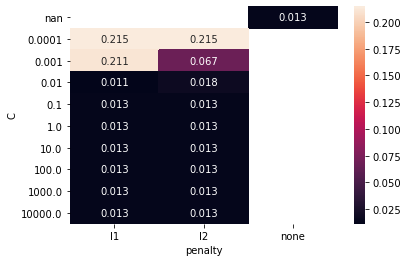

In [21]:
import seaborn as sns

results_adult = pd.DataFrame( model_adult.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results_adult['score_acc'] = 1 - model_adult.cv_results_['mean_test_accuracy']

# get rid of classifier__XX in columns
cols_adult = results_adult.columns.to_series().str.split('__').apply(lambda x: x[-1])
results_adult.columns = cols_adult


# lets show the results for the saga solver across penalty & C values
ax_adult = sns.heatmap( results_adult.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')



### LETTER Dataset

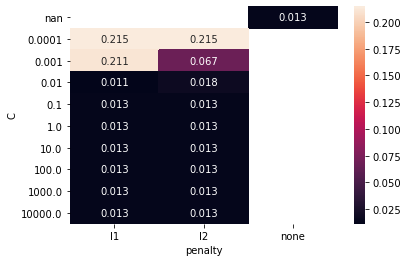

In [22]:
results_letter = pd.DataFrame( model_letter.cv_results_['params'] )
results_letter['score_acc'] = 1 - model_letter.cv_results_['mean_test_accuracy']
cols_letter = results_letter.columns.to_series().str.split('__').apply(lambda x: x[-1])
results_letter.columns = cols_letter
ax_letter = sns.heatmap( results_letter.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

### CHESS Dataset

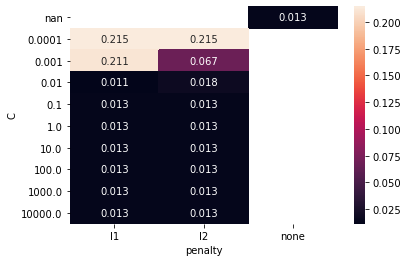

In [23]:
results_chess = pd.DataFrame( model_chess.cv_results_['params'] )
results_chess['score_acc'] = 1 - model_chess.cv_results_['mean_test_accuracy']
cols_chess = results_chess.columns.to_series().str.split('__').apply(lambda x: x[-1])
results_chess.columns = cols_chess
ax_chess = sns.heatmap( results_chess.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

### OCCUPANCY Dataset

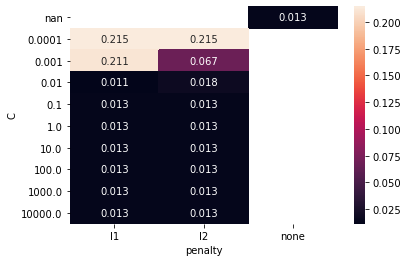

In [24]:
results_occupancy = pd.DataFrame( model_occupancy.cv_results_['params'] )
results_occupancy['score_acc'] = 1 - model_occupancy.cv_results_['mean_test_accuracy']
cols_occupancy = results_occupancy.columns.to_series().str.split('__').apply(lambda x: x[-1])
results_occupancy.columns = cols_occupancy
ax_occupancy = sns.heatmap( results_occupancy.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')